In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from src import airport_graph_loader
from src.flight_schedule_gen import FlightScheduleGen

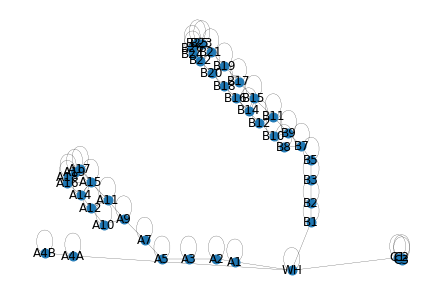

In [2]:
G_airport = airport_graph_loader.load_sparse('data/gate_pos.csv')
node_pos = nx.get_node_attributes(G_airport, 'pos')
nx.draw(G_airport, node_pos, width=0.2, node_size=80, with_labels=True)

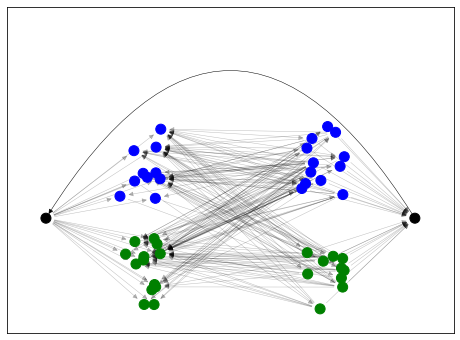

In [9]:
gen = FlightScheduleGen(G_airport, 10, 12)
G_schedule = gen.generate()

def pos_external_uniform(nodes, x_center, y_center, dx, dy):
    return {
        node: np.random.uniform(
            low=[x_center-dx, y_center-dy], 
            high=[x_center+dx, y_center+dy]
        )
        for i, node in enumerate(nodes)
    }


pos = {}

x = 1
y = .9
dx = .25
dy = .6
pos |= pos_external_uniform(gen.in_flight_nodes, -x, y, dx, dy)
pos |= pos_external_uniform(gen.out_flight_nodes, x, y, dx, dy)
pos |= pos_external_uniform(gen.in_external_nodes, -x, -y, dx, dy)
pos |= pos_external_uniform(gen.out_external_nodes, x, -y, dx, dy)

pos['s'] = np.array([-2, 0])
pos['t'] = np.array([2, 0])


plt.figure(figsize=(8,6))

node_colors = []
for node in G_schedule:
    node_attr = G_schedule.nodes[node]
    if 'loc' not in node_attr:
        color = 'black'
    elif node_attr['loc'] == 'WH':
        color = 'green'
    else:
        color = 'blue'
    node_colors += [color]

nx.draw_networkx_nodes(G_schedule, pos=pos, node_size=100, node_color=node_colors)


G_copy = G_schedule.copy()
G_copy.remove_edge('t', 's')
_ = nx.draw_networkx_edges(G_copy, pos=pos, width=.5, alpha=.25)
G = nx.DiGraph()
G.add_edge('t', 's')
_ = nx.draw_networkx_edges(G, pos=pos, width=.5, connectionstyle='arc3,rad=.8', node_size=100)

In [10]:
flow_dict = nx.min_cost_flow(G_schedule)
flow_dict['t']['s']
min_num_wc = flow_dict['t']['s']
print(f'total wheelchair demaind = {gen.total_demand}')
print(f'min number of wheelchairs = {min_num_wc}')

total wheelchair demaind = 34
min number of wheelchairs = 18
